# Segunda Evaluación Física Computacional 1 (2021-1)
### Gabriel Alberto López Monge
(5 de Abril de 2021)

Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 

### Bibliotecas

In [11]:
import numpy as np
import pylab as pl
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d
from scipy import integrate, linalg
import pylab as plt
import math as math

%matplotlib inline

**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

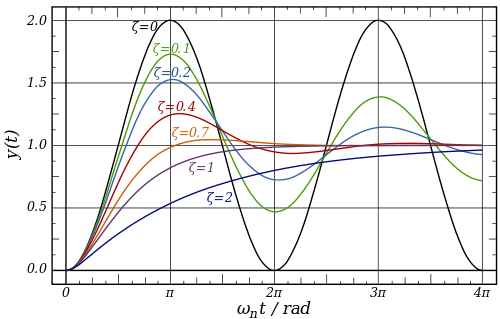

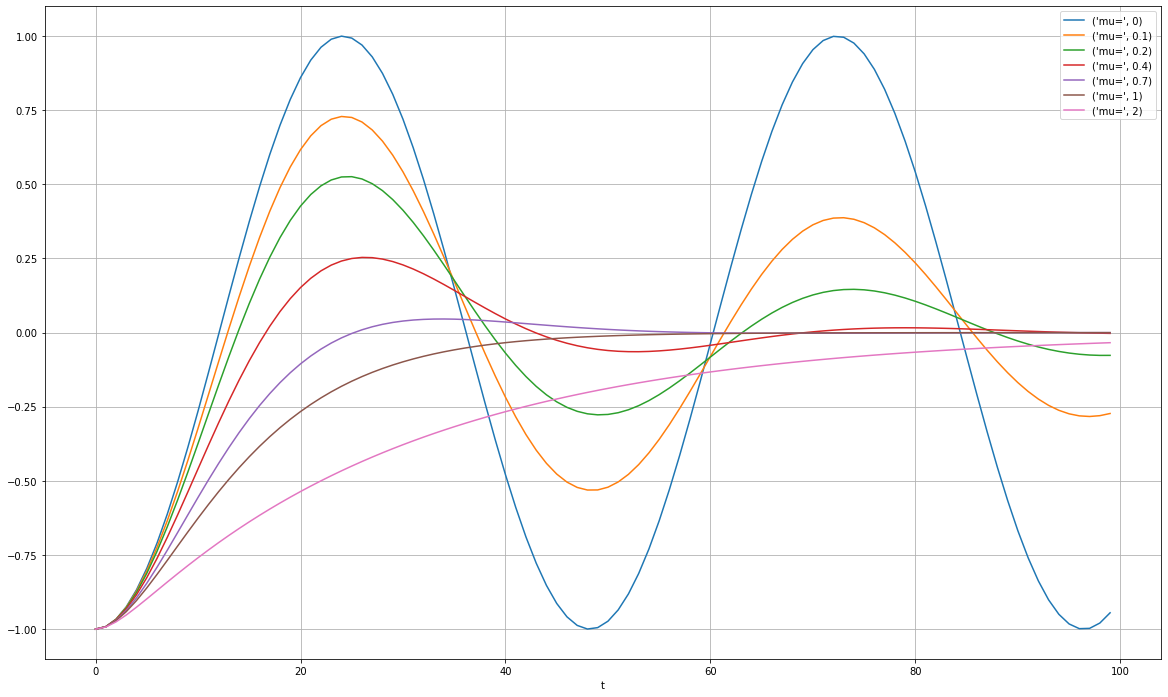

In [16]:
def VanderPol(y,t,Wn,C):
        x, p = y
        dydt = [p, (-2)*C*Wn*p-x*Wn**(2)]
        return dydt

t = np.linspace(0,4.3,100)

k=9.
m=1.

Wn=np.sqrt(k/m)

t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [-1, 0]




plt.figure(figsize=(20,12))

for C in [0, 0.1, 0.2, 0.4, 0.7, 1, 2]:
  sol=odeint(VanderPol, y_0, t, args=(Wn,C,))
  y=sol[:,0] 
  plt.plot(y, label=('mu=',C))
  plt.legend(loc='best')
  plt.xlabel('t')
  plt.grid()
plt.show()

**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

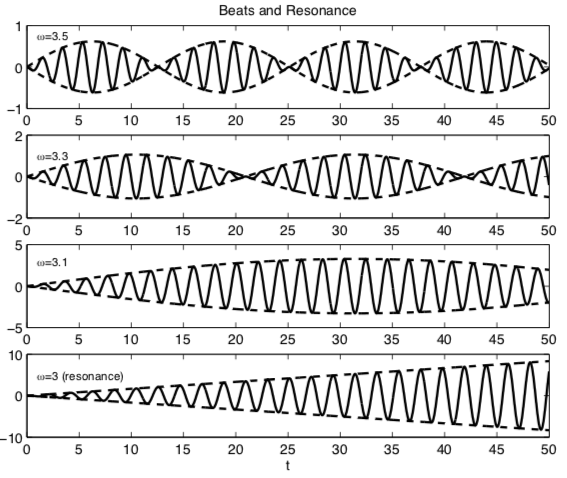

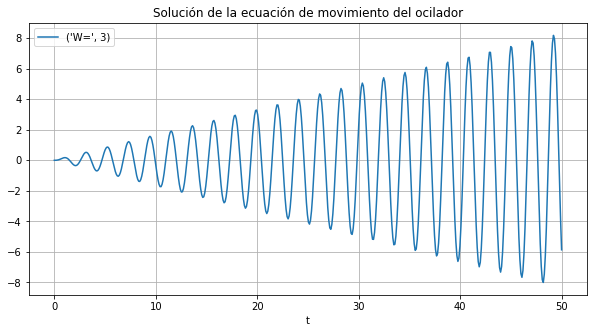

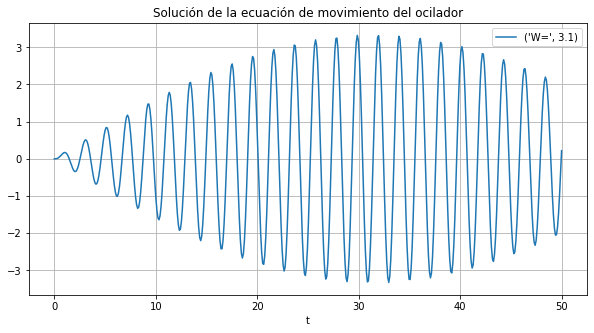

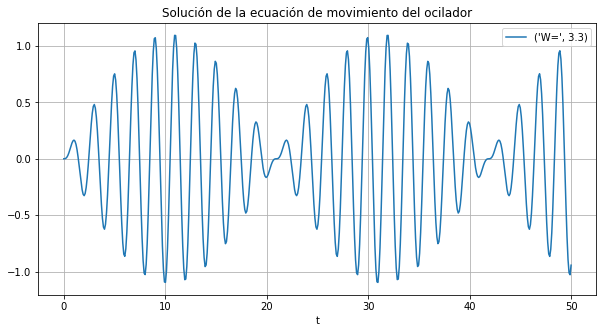

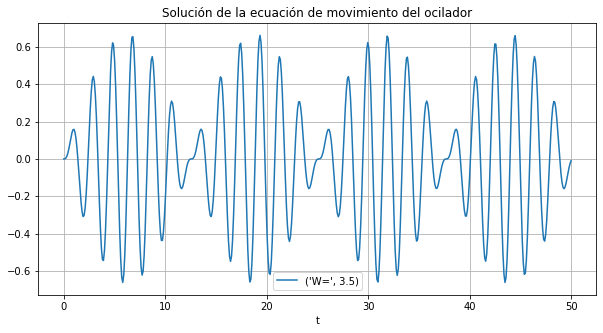

In [15]:
# Resolveremos la ecuacipon por separado para una mayor facilidad

# DEFINIMOS LOS VALORES INICIALES PARA RESOLVER LA ECUACIÓN

F0 = 1            # FORZAMIENTO TIPO SINOIDAL
M = 1             # TASA DE AMORTIGUAMIENTO
K = 9             # FRECUENCIA ANGULAR NATURAL
c = 0.0000174     # COEFICIENTE DE VISCOCIDAD

Wn = np.sqrt (K/M)
t = np.linspace( 0, 50, 500 )

# SOLUCION NUMERICA PARA EL PROBLEMA
X0 = np.array([0, 0])                     # Condiciones iniciales

for W in [3, 3.1, 3.3, 3.5]:

# DEFINIMOS UN VECTOR X: X[0]= x , X[1]= v

  def dX_dt(X, t=1):
      return np.array([ X[1] , (1/M)*F0*math.sin(W*t) - (Wn**2)*X[0]])

  X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
  x, y = X.T

  plt.figure(figsize=(10,5))
  print()
  plt.plot( t, x , label=('W=', W))
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del ocilador')
  plt.xlabel('t')
  plt.grid()
  plt.show()

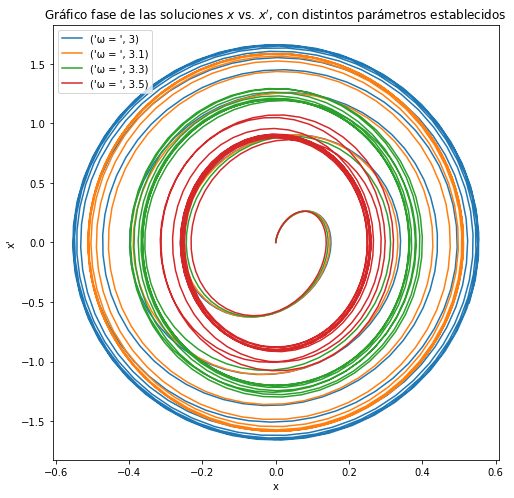

In [17]:
# Definimos la función derivada
def dxdt3(y, t, m, F0, w, zeta, wn):
  x, v = y
  r = [v, (1/m)*F0*np.sin(w*t)-2*zeta*wn*v - wn**2*x]
  return r

# Definimos los parámetros a utilizar y valores iniciales:
m = 1
k = 9
wn = np.sqrt(k/m)
F0 = 1
zeta = 0.1
W = [3,3.1,3.3,3.5]
x0=0
xprima0=0
y0=[x0,xprima0]

t=np.linspace(0,20,500)

# Resolvemos la ecuación y graficamos las soluciones para distintos valores de w:
plt.figure(figsize=(8,8))
for w in W:
  y=odeint(dxdt3,y0,t,args=(m,F0,w,zeta,wn))
  plt.plot(y[:,0],y[:,1], label=('ω = ',w))
plt.title(("Gráfico fase de las soluciones $x$ vs. $x'$, con distintos parámetros establecidos"))
plt.xlabel('x')
plt.ylabel("x'")
plt.legend()
plt.show()